------------------------------------------------------------------------------------------------------------
Sexratio = 0.25
Expected Ratio:  0.875
Expected Teta = 4*Ne*mu =  1.875e-05

Number of WF simulations:  500
WF Median Ratio:  0.9043426133319035
Median Pi Autosome:  1.87067e-05

Number of NWF simulations:  500
NWF Median Ratio:  0.9033835879949869
Median Pi Autosome:  1.248475e-05


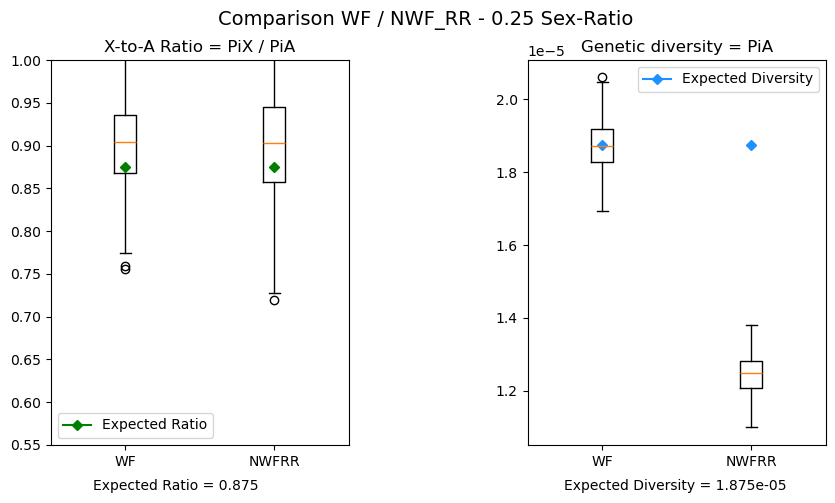

------------------------------------------------------------------------------------------------------------
Sexratio = 0.5
Expected Ratio:  0.75
Expected Teta = 4*Ne*mu =  2.5e-05

Number of WF simulations:  500
WF Median Ratio:  0.7459810387368123
Median Pi Autosome:  2.5021799999999998e-05

Number of NWF simulations:  500
NWF Median Ratio:  0.7472538504120552
Median Pi Autosome:  1.6670149999999998e-05


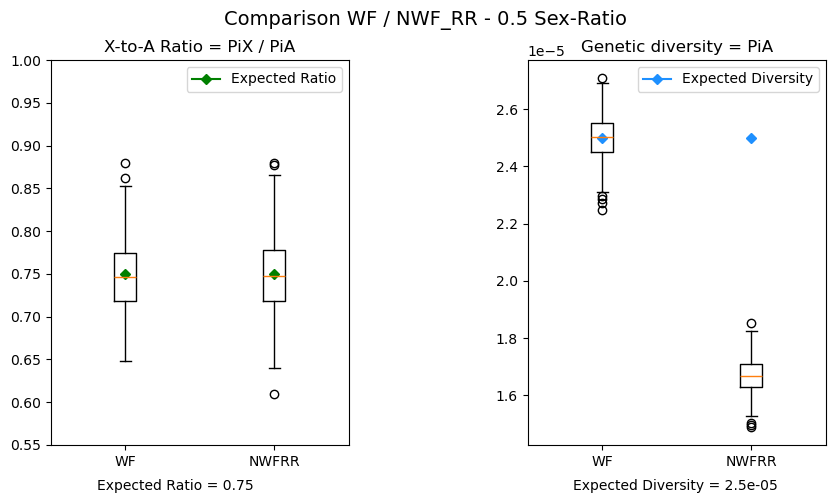

------------------------------------------------------------------------------------------------------------
Sexratio = 0.75
Expected Ratio:  0.625
Expected Teta = 4*Ne*mu =  1.875e-05

Number of WF simulations:  226
WF Median Ratio:  0.6470224630181927
Median Pi Autosome:  1.87417e-05

Number of NWF simulations:  226
NWF Median Ratio:  0.6427360308285164
Median Pi Autosome:  1.24317e-05


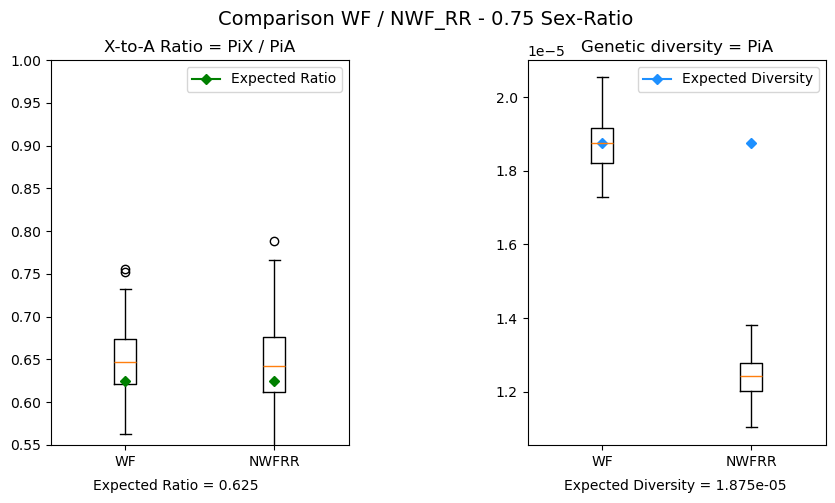

In [2]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/Test_NWF_random_repro/"
#FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/Pi_WF_NWFVan/"
LSexRatio = [0.25,0.5,0.75]

for SR in LSexRatio:
    WF_Pi_ratio = []
    NWF_Pi_ratio = []
    WF_PiA = []
    NWF_PiA = []
    for NUM in range(1,501):
        File = FOLDER+"WF_SexRatio"+str(SR)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                WF_Pi_ratio.append(float(Values[1])/float(Values[0]))
                WF_PiA.append(float(Values[0]))
                Text.close()
            
        File = FOLDER+"NWF_RandomRepro_SexRatio"+str(SR)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                NWF_Pi_ratio.append(float(Values[1])/float(Values[0]))
                NWF_PiA.append(float(Values[0]))
                Text.close()
    
    expected_ratio = 1-SR*0.5
    Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
    expected_teta = round (4*Ne*1.25e-8,10)
    WF_median = np.median(WF_Pi_ratio)
    NWF_median = np.median(NWF_Pi_ratio)
    WF_PiA_median = np.median(WF_PiA)
    NWF_PiA_median = np.median(NWF_PiA)
    print("------------------------------------------------------------------------------------------------------------")
    print("Sexratio = "+str(SR))
    print("Expected Ratio: ",expected_ratio)
    print("Expected Teta = 4*Ne*mu = ", expected_teta )
    print()
    print("Number of WF simulations: ",len(WF_Pi_ratio))
    print("WF Median Ratio: ",WF_median)
    print("Median Pi Autosome: ",WF_PiA_median)
    print()
    print("Number of NWF simulations: ",len(WF_Pi_ratio))
    print("NWF Median Ratio: ",NWF_median)
    print("Median Pi Autosome: ",NWF_PiA_median)


    fig, ax = mp.subplots(1,2,figsize=(10, 5))
    fig.subplots_adjust(wspace=0.6)
    fig.suptitle(f"Comparison WF / NWF_RR - {SR} Sex-Ratio", fontsize=14)

    ax[0].boxplot([WF_Pi_ratio,NWF_Pi_ratio],tick_labels=["WF","NWFRR"])
    ax[0].set_title("X-to-A Ratio = PiX / PiA")
    ax[0].plot(1, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
    ax[0].plot(2, expected_ratio, marker='D', color='green', markersize=5)
    ax[0].set_ylim([0.55, 1])
    ax[0].legend()

    ax[1].boxplot([WF_PiA,NWF_PiA],tick_labels=["WF","NWFRR"])
    ax[1].set_title("Genetic diversity = PiA")
    ax[1].plot(1, expected_teta, marker='D', color='dodgerblue', markersize=5, label='Expected Diversity')
    ax[1].plot(2, expected_teta, marker='D', color='dodgerblue', markersize=5)
    ax[1].legend()

    fig.text(0.25, 0.02, 'Expected Ratio = '+str(expected_ratio), 
         ha='center', fontsize=10)

    fig.text(0.75, 0.02, 'Expected Diversity = '+str(expected_teta), 
         ha='center', fontsize=10)
    
    #fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 

    mp.show()